In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
iris = datasets.load_iris()
data = iris.data[:, :2] #data
label = iris.target #label


In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X = data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

X_new=np.hstack((X_train,np.ones((len(X_train),1))))

In [ ]:
df=pd.DataFrame(data=np.hstack((X_train,label.reshape(len(data),1))),columns=['Sepal Length','Sepal Width','label'])
df['label']=df['label'].apply(lambda x : int(x))
df

,Sepal Length,Sepal Width,label
0,-0.900681,1.019004,0
1,-1.143017,-0.131979,0
2,-1.385353,0.328414,0
3,-1.506521,0.098217,0
4,-1.021849,1.249201,0
...,...,...,...
145,1.038005,-0.131979,2
146,0.553333,-1.282963,2
147,0.795669,-0.131979,2
148,0.432165,0.788808,2


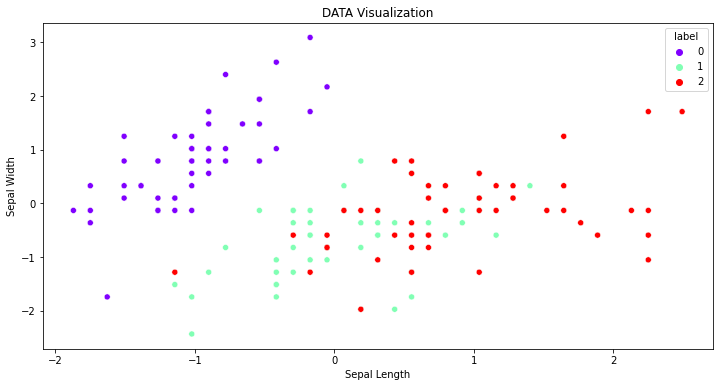

In [ ]:
fig=plt.figure(figsize=(12,6))
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df,hue='label',palette='rainbow')
plt.title("DATA Visualization");

In [ ]:
nPerClust=50
new_label1=np.hstack((np.ones((nPerClust)),-np.ones((nPerClust)),-np.ones((nPerClust))))
new_label1

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
df1=pd.DataFrame(data=np.hstack((X_new,new_label1.reshape(len(data),1))),columns=['Sepal Length','Sepal Width','bias','label'])
df1['label']=df1['label'].apply(lambda x : int(x))
df1

,Sepal Length,Sepal Width,bias,label
0,-0.900681,1.019004,1.0,1
1,-1.143017,-0.131979,1.0,1
2,-1.385353,0.328414,1.0,1
3,-1.506521,0.098217,1.0,1
4,-1.021849,1.249201,1.0,1
...,...,...,...,...
145,1.038005,-0.131979,1.0,-1
146,0.553333,-1.282963,1.0,-1
147,0.795669,-0.131979,1.0,-1
148,0.432165,0.788808,1.0,-1


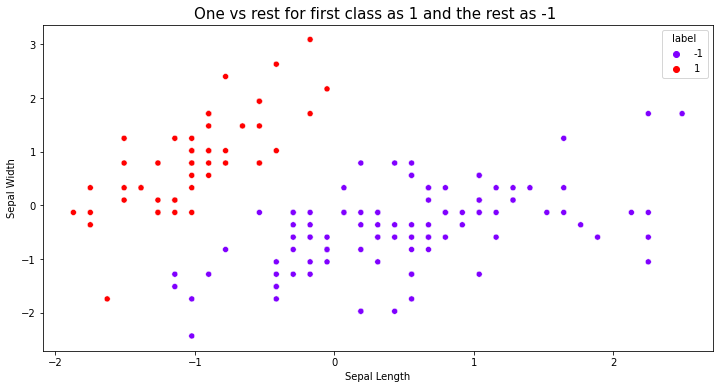

In [ ]:
fig=plt.figure(figsize=(12,6))
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df1,hue='label',palette='rainbow')
plt.title('One vs rest for first class as 1 and the rest as -1 ',size=15);

In [ ]:
def loss_one(W, x, y, C):
    return 1/2 * np.sum(W**2) + C * np.sum([np.max([0, 1 - y * (W @ x)])])

In [ ]:
def loss_all(W, x, y, C):
    return 1/2 * np.sum(W**2) + C * np.sum([np.max([0, 1 - y[i] * (W @ x[i])]) for i in range(x.shape[0])])

In [ ]:
def lossGradient(W, x, y, C):
    lossGrad = np.zeros(W.shape[0])
    distance = [np.max([0, 1 - y[i] * (W @ x[i])]) for i in range(x.shape[0])]
    #print(distance)
    for i,d in enumerate(distance):
      if d==0:
        lossGrad+=W
      else:
        lossGrad+=W - C * y[i] * x[i]
         
    return lossGrad/x.shape[0]

In [ ]:
from numpy import linalg as LA
def return_tk(W,beta, sigma,C, X, gradf ,func):
    i = 0
    while True:
        if func(W+np.power(beta, i) * -gradf(W,X[:3],X[3],C),X[:3],X[3],C) <= func(W,X[:3],X[3],C) + np.power(beta, i) * sigma * gradf(W,X[:3],X[3],C).T @ (-gradf(W,X[:3],X[3],C)) :
            break
        i += 1
    return np.power(beta, i)

In [ ]:
def SGD(df,Y,b_size, W_init,nepochs,C,lr):
  W=W_init.copy()
  for iter in range(nepochs):
    df=df.sample(frac=1).reset_index(drop=True)
    for i in range(int(150/b_size)):
      x_batch=df.iloc[b_size*i:b_size*(i+1)].drop('label',axis=1).values
      y_batch=df.iloc[b_size*i:b_size*(i+1)]['label'].values
      W=W-lr*lossGradient(W,x_batch,y_batch,C)
    print(loss_all(W,X_new,Y,C))
    print(W)
    if loss_all(W,X_new,Y,C)<0.01:
      print("Proccessed finished ! , converged by {} epochs with W={}".format(iter+1,W))
      break
  return W


In [ ]:
from numpy import linalg as LA
def return_tk(W,df,gradf,beta,sigma,C,func):
    i = 0
    while True:
        if func(W+np.power(beta, i) * -gradf(W,df.drop('label',axis=1).values,df['label'].values,C),df.drop('label',axis=1).values,df['label'].values,C) <= func(W,df.drop('label',axis=1).values,df['label'].values,C) + np.power(beta, i) * sigma * gradf(W,df.drop('label',axis=1).values,df['label'].values,C).T @ (-gradf(W,df.drop('label',axis=1).values,df['label'].values,C)) :
            break
        i += 1
    return np.power(beta, i)

In [ ]:
def SD_with_armijo(df,Y, W_init,nepochs,C):
  beta=0.5
  sigma=0.0001
  W=W_init.copy()
  for iter in range(nepochs):
    df=df.sample(frac=1).reset_index(drop=True)
    lr=return_tk(W,df,lossGradient,beta,sigma,C,loss_all)
    W=W-lr*lossGradient(W,df.drop('label',axis=1).values,df['label'].values,C)
    print(loss_all(W,X_new,Y,C))
    if loss_all(W,X_new,Y,C)<0.01:
      print("Proccessed finished ! , converged by {} epochs with W={}".format(iter+1,W))
      break
  return W


In [ ]:
W1_SGD=SGD(df1,new_label1,30,np.random.rand(3),25,1e5,1e-4)

244861.52399445645
[-7.02581247  4.99810392 -3.55276115]
130160.8296528216
[-7.38587549  4.45846198 -3.55085181]
97320.24391633648
[-7.36477537  4.34667192 -3.88231008]
94033.97333722239
[-7.34350285  4.31187501 -4.21370264]
94975.48259589108
[-7.32225711  4.20035557 -4.54492954]
295403.84250507026
[-6.91998055  4.59328737 -5.20939086]
72350.43727142698
[-7.45908405  4.00987224 -4.87345335]
193252.39366749636
[-7.99780954  3.42686497 -4.53775044]
202625.29512351076
[-7.23210492  4.35682025 -5.20188206]
17569.55372905947
[-7.77105239  3.77352333 -4.86594831]
149549.8551131504
[-7.3862382   4.19920586 -5.19678249]
55882.99519118172
[-7.92505436  3.61604584 -4.86088462]
56865.404872975974
[-7.70174227  3.96504743 -5.19168802]
17262.807766676633
[-7.85932468  3.88645693 -5.18915935]
9200.500368049052
[-8.01686641  3.80785528 -5.18659861]
47420.502731450084
[-8.17445981  3.6524324  -5.18393918]
54931.62994976486
[-7.95099075  4.00143115 -5.51458108]
15311.708661536544
[-8.10848665  3.922772

The Slope of the line is : 2.3327881442212983
The Intercept of the line is : 1.5975396526020949



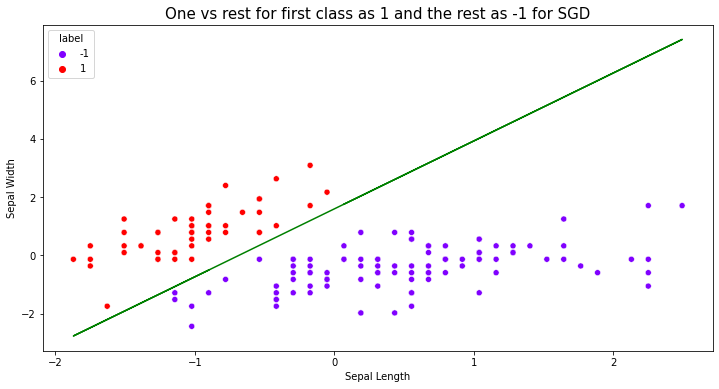

In [ ]:
m1_SGD=-W1_SGD[0]/W1_SGD[1]
b1_SGD=-W1_SGD[2]/W1_SGD[1]
print("The Slope of the line is : {}".format(m1_SGD))
print("The Intercept of the line is : {}\n".format(b1_SGD))
fig=plt.figure(figsize=(12,6))
plt.plot(X_train[:,0],m1_SGD*X_train[:,0]+b1_SGD,color='green')
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df1,hue='label',palette='rainbow')
plt.title('One vs rest for first class as 1 and the rest as -1 for SGD',size=15);

In [ ]:
W1_SD=SD_with_armijo(df1,new_label1,np.random.rand(3),25,1e5)

8189906.553002509
43093.28979414066
10773.322448535157
2693.3306121337764
673.3326530334454
168.33316325836225
128.8800781196835
98.67380981038274
97.90442631408902
97.52236062454693
97.33198026852273
97.2369527122942
97.22508332932594
97.21914927172143
97.21618240137389
97.2146990058119
97.21395731793359
97.2138646075014
97.21381825232399
97.21379507474497
97.21378348595786
97.2137820373596
97.21378185628483
97.21378185062625
97.21378184779695


The Slope of the line is : 2.019047685613618
The Intercept of the line is : 1.3544862912906126



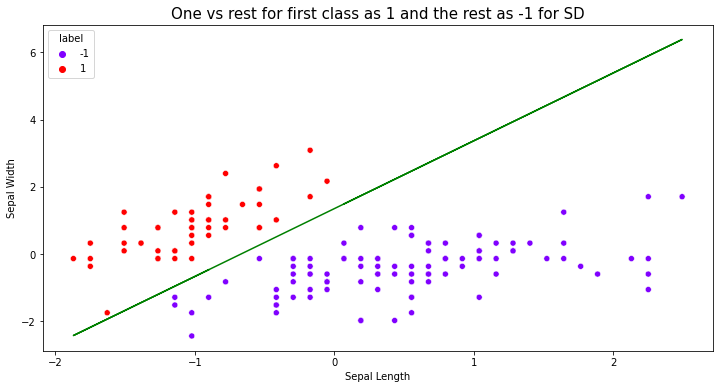

In [ ]:
m1_SD=-W1_SD[0]/W1_SD[1]
b1_SD=-W1_SD[2]/W1_SD[1]
print("The Slope of the line is : {}".format(m1_SD))
print("The Intercept of the line is : {}\n".format(b1_SD))
fig=plt.figure(figsize=(12,6))
plt.plot(X_train[:,0],m1_SD*X_train[:,0]+b1_SD,color='green')
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df1,hue='label',palette='rainbow')
plt.title('One vs rest for first class as 1 and the rest as -1 for SD',size=15);

In [ ]:
nPerClust=50
new_label2=np.hstack((-np.ones((nPerClust)),np.ones((nPerClust)),-np.ones((nPerClust))))
new_label2

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
df2=pd.DataFrame(data=np.hstack((X_new,new_label2.reshape(len(data),1))),columns=['Sepal Length','Sepal Width','bias','label'])
df2['label']=df2['label'].apply(lambda x : int(x))
df2

,Sepal Length,Sepal Width,bias,label
0,-0.900681,1.019004,1.0,-1
1,-1.143017,-0.131979,1.0,-1
2,-1.385353,0.328414,1.0,-1
3,-1.506521,0.098217,1.0,-1
4,-1.021849,1.249201,1.0,-1
...,...,...,...,...
145,1.038005,-0.131979,1.0,-1
146,0.553333,-1.282963,1.0,-1
147,0.795669,-0.131979,1.0,-1
148,0.432165,0.788808,1.0,-1


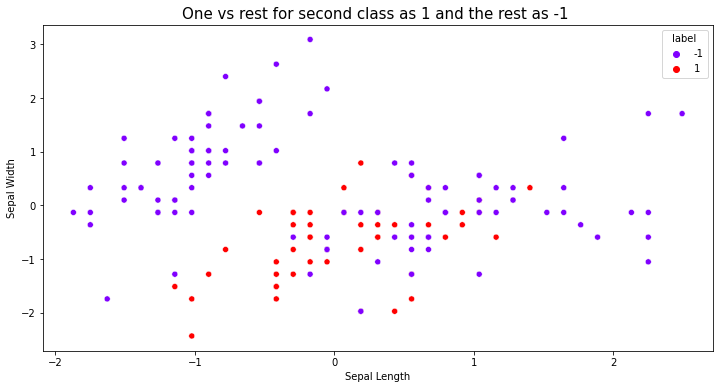

In [ ]:
fig=plt.figure(figsize=(12,6))
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df2,hue='label',palette='rainbow')
plt.title('One vs rest for second class as 1 and the rest as -1 ',size=15);

In [ ]:
W2_SGD=SGD(df2,new_label2,30,np.random.rand(3),25,1e5,1e-4)

11572730.22905305
[ 0.4458816  -2.9590426  -2.16175464]
12845560.978470428
[ 0.87802106 -3.39705264 -1.16104062]
11066415.246653251
[ 0.84302864 -1.5655835  -0.49376023]
12592268.81277914
[-0.94483681 -3.30667353 -1.82598017]
24777488.85246914
[-1.85498362 -1.18873738 -4.49210066]
10473201.998644752
[ 0.33577124 -2.36225647 -0.82448825]
13124197.021308564
[ 0.98202454 -3.1286339  -0.82374274]
14854291.57744517
[-0.54712909 -3.82918739 -0.15616433]
10981692.863241585
[-0.71944029 -2.42382585 -1.48875301]
15466835.877216931
[-0.70744792 -0.75578354 -2.48794211]
11190289.711029898
[-0.37906288 -2.91457963 -1.82049826]
13282817.58523753
[ 0.21973994 -3.0567595  -0.15288821]
12613324.247277984
[ 1.37513784 -2.56102001 -2.15224518]
14505172.0191484
[ 0.18476894 -2.29794978  0.51549739]
12512839.500136055
[ 1.05686187 -3.1838176  -1.48366043]
12002446.203237547
[-0.2638602  -2.59031106 -2.48305209]
15106833.01937853
[-0.36209113 -0.25429825 -2.14891074]
12063004.438465165
[ 0.61219105 -3.4103

The Slope of the line is : 0.06207754484837785
The Intercept of the line is : 0.25758589454327324



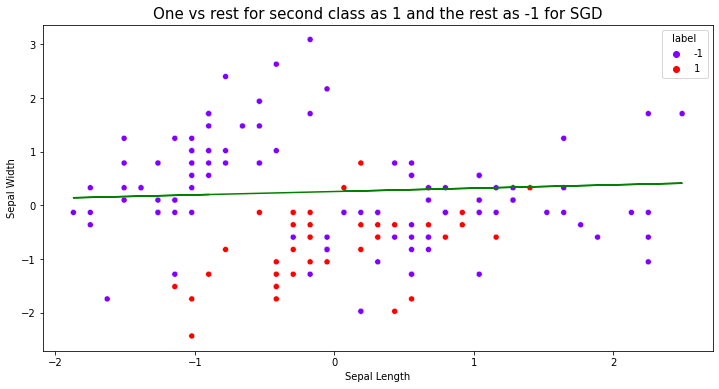

In [ ]:
m2_SGD=-W2_SGD[0]/W2_SGD[1]
b2_SGD=-W2_SGD[2]/W2_SGD[1]
print("The Slope of the line is : {}".format(m2_SGD))
print("The Intercept of the line is : {}\n".format(b2_SGD))
fig=plt.figure(figsize=(12,6))
plt.plot(X_train[:,0],m2_SGD*X_train[:,0]+b2_SGD,color='green')
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df2,hue='label',palette='rainbow')
plt.title('One vs rest for second class as 1 and the rest as -1 for SGD',size=15);

In [ ]:
W2_SD=SD_with_armijo(df2,new_label2,np.random.rand(3),25,1e5)

15274303.726872658
10848943.604383556
9556120.136321211
8977690.55390098
8907020.29603632
8891438.69763336
8880958.317000993
8872882.11543448
8866797.264068227
8860558.467337104
8859361.747324524
8859287.529093338
8858907.804960752
8858625.065601746
8858624.336850775
8858606.670517243
8858598.94926156
8858588.275454864
8858585.042454645
8858551.485497383
8858534.267388495
8858523.049430814
8858497.813452713
8858497.222795531
8858496.663765864


The Slope of the line is : -0.09924999737079206
The Intercept of the line is : -0.7985590466301314



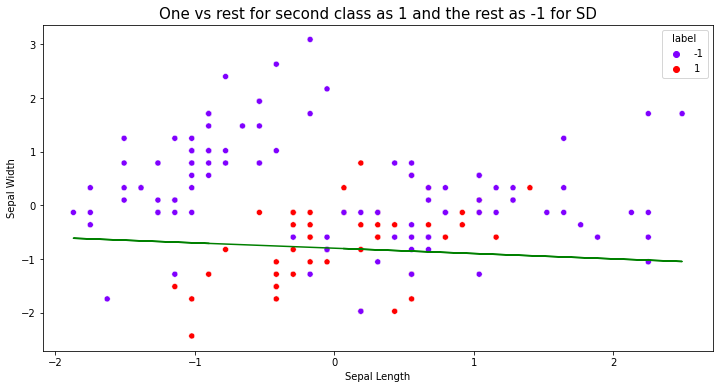

In [ ]:
m2_SD=-W2_SD[0]/W2_SD[1]
b2_SD=-W2_SD[2]/W2_SD[1]
print("The Slope of the line is : {}".format(m2_SD))
print("The Intercept of the line is : {}\n".format(b2_SD))
fig=plt.figure(figsize=(12,6))
plt.plot(X_train[:,0],m2_SD*X_train[:,0]+b2_SD,color='green')
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df2,hue='label',palette='rainbow')
plt.title('One vs rest for second class as 1 and the rest as -1 for SD',size=15);

In [ ]:
nPerClust=50
new_label3=np.hstack((-np.ones((nPerClust)),-np.ones((nPerClust)),np.ones((nPerClust))))
new_label3

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
df3=pd.DataFrame(data=np.hstack((X_new,new_label3.reshape(len(data),1))),columns=['Sepal Length','Sepal Width','bias','label'])
df3['label']=df3['label'].apply(lambda x : int(x))
df3

,Sepal Length,Sepal Width,bias,label
0,-0.900681,1.019004,1.0,-1
1,-1.143017,-0.131979,1.0,-1
2,-1.385353,0.328414,1.0,-1
3,-1.506521,0.098217,1.0,-1
4,-1.021849,1.249201,1.0,-1
...,...,...,...,...
145,1.038005,-0.131979,1.0,1
146,0.553333,-1.282963,1.0,1
147,0.795669,-0.131979,1.0,1
148,0.432165,0.788808,1.0,1


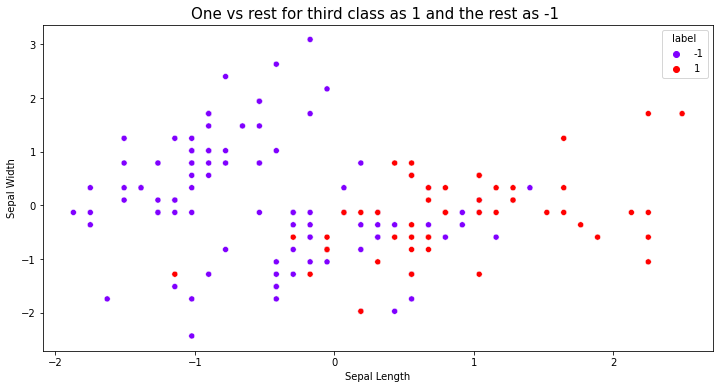

In [ ]:
fig=plt.figure(figsize=(12,6))
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df3,hue='label',palette='rainbow')
plt.title('One vs rest for third class as 1 and the rest as -1 ',size=15);

In [ ]:
W3_SGD=SGD(df3,new_label3,30,np.random.rand(3),30,1e5,1e-4)

10005290.796393989
[ 4.26628022 -2.19284049 -1.97100807]
7263365.891240588
[ 2.59073346 -0.62501341 -1.6363895 ]
11004032.996761568
[ 4.07710471e+00 -1.01529903e-03  3.11284868e-02]
7951641.531379335
[ 3.49367222 -0.12037536 -1.96845384]
16690624.024654854
[ 5.39464159 -0.36262902  1.03236355]
8102554.833267971
[ 3.85386333 -0.5033824  -1.96698603]
13486928.508976677
[ 5.43837474  1.77620485 -0.63260269]
9553493.825651046
[ 4.15585876 -1.69816517 -1.63178653]
8014415.476359616
[ 3.72708936 -0.80980421 -1.9643708 ]
8915347.18706207
[ 2.16774552  0.07836143 -2.29675548]
8150772.264486411
[ 3.78142132 -0.99582064 -2.29590728]
8062169.840034984
[ 3.18474091 -0.78801773 -0.96165951]
7162331.4221899565
[ 1.85062012 -0.78793622 -0.96107879]
11739035.156205265
[ 3.95518589  1.426086   -0.29369836]
13002203.127347212
[ 1.19108189  1.07611835 -2.29331824]
9084625.66045891
[ 4.25944108 -1.91641399 -2.29260502]
7796515.618266695
[ 3.3166896   0.33096528 -1.29145897]
12610326.592780015
[ 2.1035715 

The Slope of the line is : 2.6754459945710494
The Intercept of the line is : -2.4133071335069993



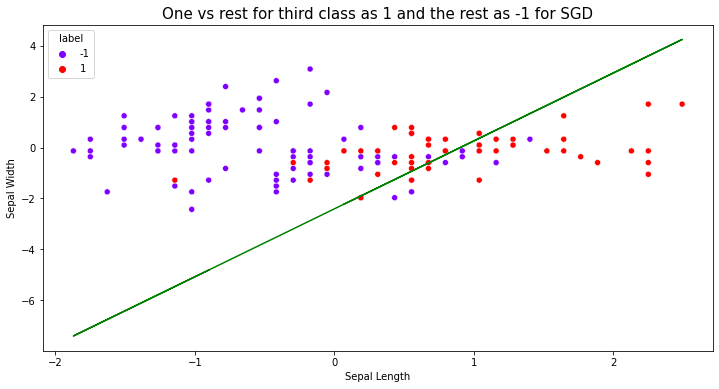

In [ ]:
m3_SGD=-W3_SGD[0]/W3_SGD[1]
b3_SGD=-W3_SGD[2]/W3_SGD[1]
print("The Slope of the line is : {}".format(m3_SGD))
print("The Intercept of the line is : {}\n".format(b3_SGD))
fig=plt.figure(figsize=(12,6))
plt.plot(X_train[:,0],m3_SGD*X_train[:,0]+b3_SGD,color='green')
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df3,hue='label',palette='rainbow')
plt.title('One vs rest for third class as 1 and the rest as -1 for SGD',size=15);

In [ ]:
W3_SD=SD_with_armijo(df3,new_label3,np.random.rand(3),25,1e5)

10927837.80998753
10157553.093123093
9497720.665801328
8312937.084462046
7918640.063223444
7618154.665052534
7030834.079265329
6792447.265782471
6645274.583243996
6608686.74978185
6570853.700574846
6543642.949551129
6541705.1898235325
6541627.769793268
6541549.829428382
6541468.124188299
6541394.469629898
6541308.479196346
6541239.110428078
6541148.834817403
6541144.736429943
6541118.268842009
6541111.537448536
6541057.137298496
6541045.13968789


The Slope of the line is : 117.15656758400779
The Intercept of the line is : -51.600258435433005



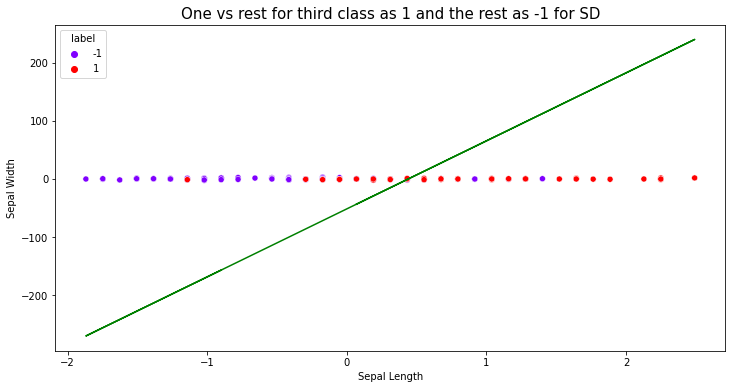

In [ ]:
m3_SD=-W3_SD[0]/W3_SD[1]
b3_SD=-W3_SD[2]/W3_SD[1]
print("The Slope of the line is : {}".format(m3_SD))
print("The Intercept of the line is : {}\n".format(b3_SD))
fig=plt.figure(figsize=(12,6))
plt.plot(X_train[:,0],m3_SD*X_train[:,0]+b3_SD,color='green')
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df3,hue='label',palette='rainbow')
plt.title('One vs rest for third class as 1 and the rest as -1 for SD',size=15);

(-10.0, 10.0)

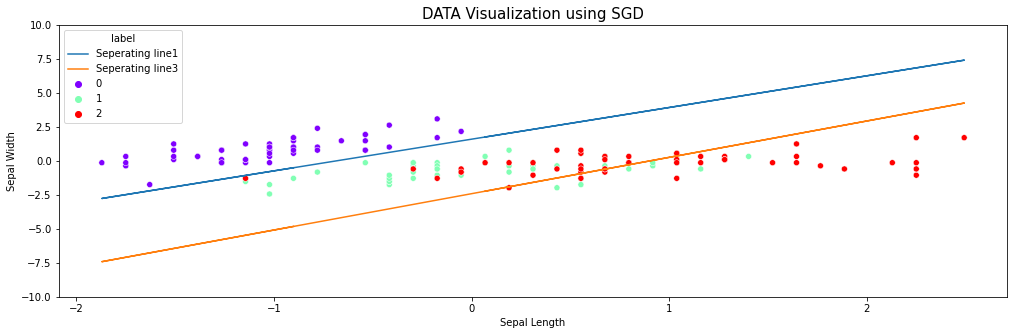

In [ ]:
fig = plt.figure(figsize=(17,5))
plt.plot(X_train[:,0],m1_SGD*X_train[:,0]+b1_SGD,label='Seperating line1')
#plt.plot(X_train[:,0],m2*X_train[:,0]+b2,label='Seperating line2')
plt.plot(X_train[:,0],m3_SGD*X_train[:,0]+b3_SGD,label='Seperating line3')
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df,hue='label',palette='rainbow')
plt.title("DATA Visualization using SGD",size=15)
plt.ylim([-10,10])


In [ ]:
def convert(x):
  if x==True:
    return 1
  else:
    return -1

**Accuracy for SGD**

In [ ]:
acc1=np.mean(np.array(list(map(convert,X_new @ W1_SGD.reshape(3,1)>=0)))==new_label1)
acc2=np.mean(np.array(list(map(convert,X_new @ W2_SGD.reshape(3,1)>=0)))==new_label2)
acc3=np.mean(np.array(list(map(convert,X_new @ W3_SGD.reshape(3,1)>=0)))==new_label3)
total_acc=(acc1+acc2+acc3)/3
print("Accuracy for class 1 and the rest is {}".format(acc1))
print("Accuracy for class 2 and the rest is {}".format(acc2))
print("Accuracy for class 3 and the rest is {}".format(acc3))
print("The total accuracy will be {}".format(total_acc))

Accuracy for class 1 and the rest is 1.0
Accuracy for class 2 and the rest is 0.6266666666666667
Accuracy for class 3 and the rest is 0.7333333333333333
The total accuracy will be 0.7866666666666666


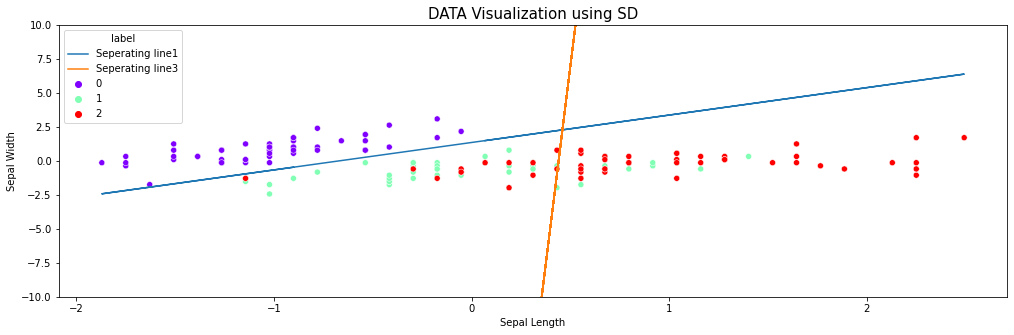

In [ ]:
fig = plt.figure(figsize=(17,5))
plt.plot(X_train[:,0],m1_SD*X_train[:,0]+b1_SD,label='Seperating line1')
#plt.plot(X_train[:,0],m2*X_train[:,0]+b2,label='Seperating line2')
plt.plot(X_train[:,0],m3_SD*X_train[:,0]+b3_SD,label='Seperating line3')
sns.scatterplot(x='Sepal Length',y='Sepal Width',data=df,hue='label',palette='rainbow')
plt.title("DATA Visualization using SD",size=15)
plt.ylim([-10,10]);


**Accuray for SD**



In [ ]:
acc1=np.mean(np.array(list(map(convert,X_new @ W1_SD.reshape(3,1) >=0)))==new_label1)
acc2=np.mean(np.array(list(map(convert,X_new @ W2_SD.reshape(3,1) >=0)))==new_label2)
acc3=np.mean(np.array(list(map(convert,X_new @ W3_SD.reshape(3,1) >=0)))==new_label3)
total_acc=(acc1+acc2+acc3)/3
print("Accuracy for class 1 and the rest is {}".format(acc1))
print("Accuracy for class 2 and the rest is {}".format(acc2))
print("Accuracy for class 3 and the rest is {}".format(acc3))
print("The total accuracy will be {}".format(total_acc))

Accuracy for class 1 and the rest is 1.0
Accuracy for class 2 and the rest is 0.74
Accuracy for class 3 and the rest is 0.8133333333333334
The total accuracy will be 0.851111111111111


In [ ]:
from sklearn.metrics import confusion_matrix

# SGD



**Group ONE**

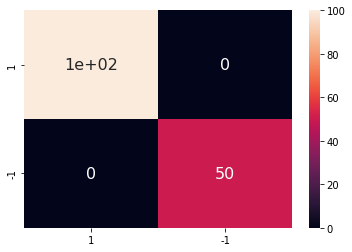

In [ ]:
cm=confusion_matrix(new_label1,np.array(list(map(convert,X_new @ W1_SGD.reshape(3,1) >=0))))
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) ;

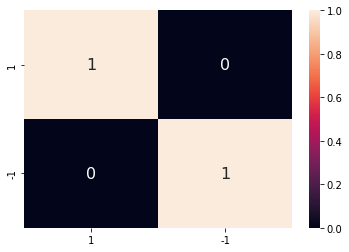

In [ ]:
cm=confusion_matrix(new_label1,np.array(list(map(convert,X_new @ W1_SGD.reshape(3,1) >=0))))
cm=cm / cm.max(axis=0)
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) ;

**Group TWO**

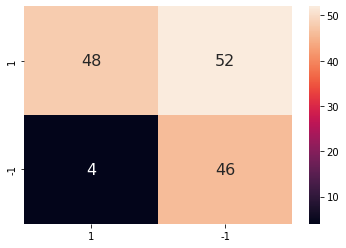

In [ ]:
cm=confusion_matrix(new_label2,np.array(list(map(convert,X_new @ W2_SGD.reshape(3,1) >=0))))
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16});

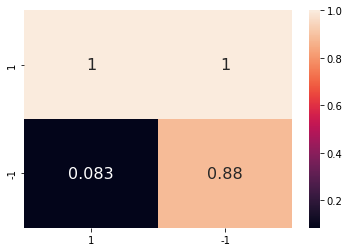

In [ ]:
cm=confusion_matrix(new_label2,np.array(list(map(convert,X_new @ W2_SGD.reshape(3,1) >=0))))
cm=cm / cm.max(axis=0)
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16});

**Group Three**

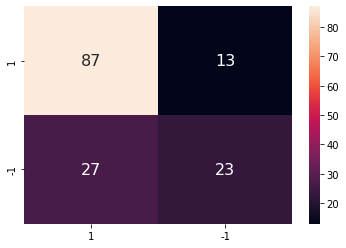

In [ ]:
cm=confusion_matrix(new_label3,np.array(list(map(convert,X_new @ W3_SGD.reshape(3,1) >=0))))
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

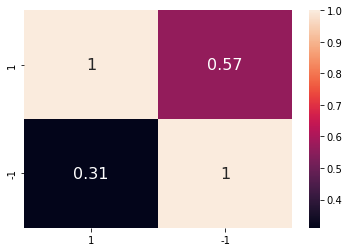

In [ ]:
cm=confusion_matrix(new_label3,np.array(list(map(convert,X_new @ W3_SGD.reshape(3,1) >=0))))
cm=cm / cm.max(axis=0)
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

# SD

**Group ONE**

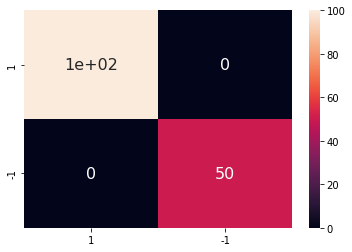

In [ ]:
cm=confusion_matrix(new_label1,np.array(list(map(convert,X_new @ W1_SD.reshape(3,1) >=0))))
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) ;

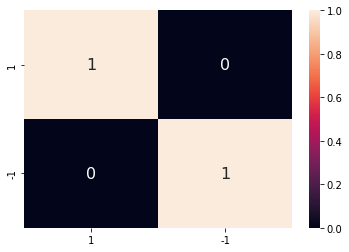

In [ ]:
cm=confusion_matrix(new_label1,np.array(list(map(convert,X_new @ W1_SD.reshape(3,1) >=0))))
cm=cm / cm.max(axis=0)
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) ;

**Group TWO**

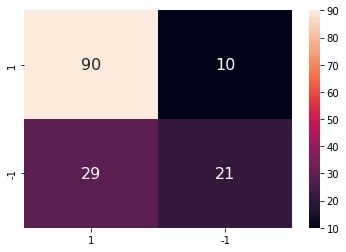

In [ ]:
cm=confusion_matrix(new_label2,np.array(list(map(convert,X_new @ W2_SD.reshape(3,1) >=0))))
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

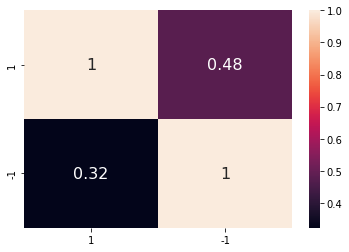

In [ ]:
cm=confusion_matrix(new_label2,np.array(list(map(convert,X_new @ W2_SD.reshape(3,1) >=0))))
cm=cm / cm.max(axis=0)
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

**Group THREE**

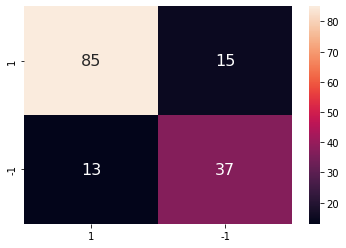

In [ ]:
cm=confusion_matrix(new_label3,np.array(list(map(convert,X_new @ W3_SD.reshape(3,1) >=0))))
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

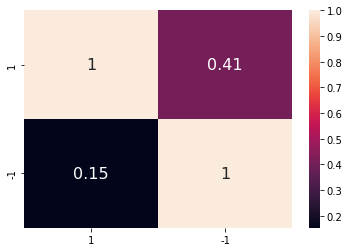

In [ ]:
cm=confusion_matrix(new_label3,np.array(list(map(convert,X_new @ W3_SD.reshape(3,1) >=0))))
cm=cm / cm.max(axis=0)
df_cm = pd.DataFrame(cm, index = [1,-1] ,columns=[1,-1])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size